In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [68]:
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


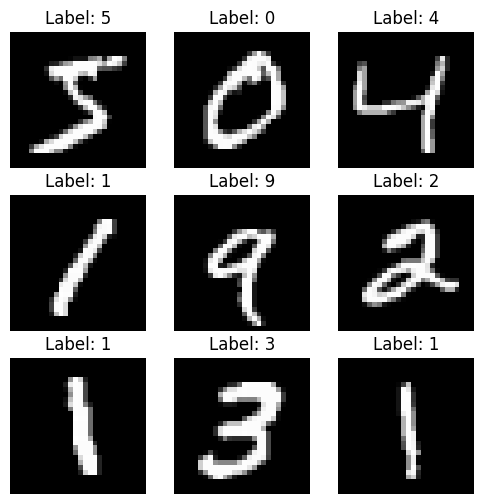

In [75]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [69]:
x_train = x_train / 255.0
x_test = x_test / 255.0
# neural networks works well when vaues are small

In [70]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 28x28 → 784
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits
])

/home/vedanshu/DL/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The core building block of neural networks is the layer. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them — hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters — the layers.

In [71]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [72]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9212 - loss: 0.2771 - val_accuracy: 0.9657 - val_loss: 0.1266
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9627 - loss: 0.1256 - val_accuracy: 0.9737 - val_loss: 0.0979
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0853 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0632 - val_accuracy: 0.9752 - val_loss: 0.0790
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9856 - loss: 0.0483 - val_accuracy: 0.9762 - val_loss: 0.0800


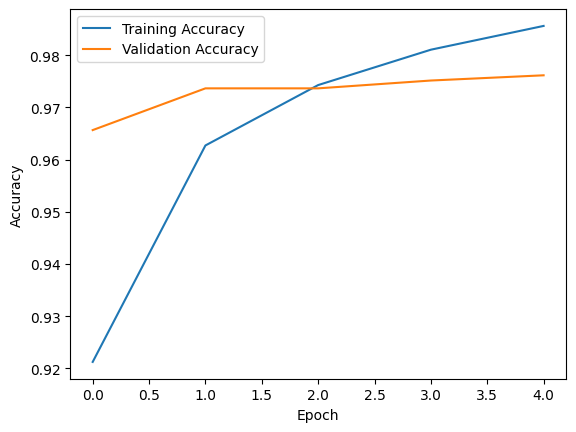

In [76]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0832
Test accuracy: 0.9763000011444092


### Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


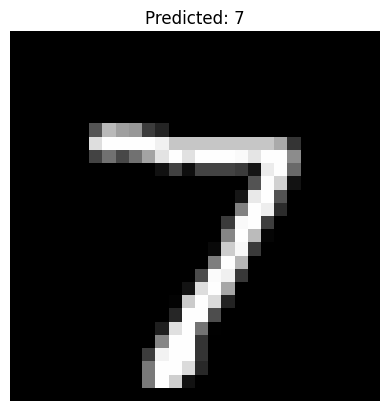

In [74]:
predictions = model.predict(x_test)
# Show first test image
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predictions[0].argmax()}")
plt.axis('off')
plt.show()

In [49]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([0.09867158, 0.11327376, 0.09811547, 0.10199065, 0.09729323,
       0.08994765, 0.09856286, 0.10512295, 0.09791622, 0.09910569],
      dtype=float32)

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1135 - loss: 2.3010
test_acc: 0.11349999904632568
